# **Analiza ekonomskega stanja slovenskih občin**
#### *Projektna naloga iz analize podatkov pri predmetu Programiranje 1*

> V svoji analizi podatkov predstavljam določene aspekte ekonomskega stanja v 210 slovenskih občinah glede na zbirko podatkov [statističnega urada Republike Slovenije](https://www.stat.si/obcine) za leto 2019. V Sloveniji od leta 2011 obstaja 212 občin - zadnji dve novonastali, Anakaran in Mirna, sta iz te analize izvzeti.
>
> #### **Zajem podatkov**
> Za vsako občino sem zajel naslednje podatke:
> * ime občine
> * regija in upravna enota
> * površina, število prebivalcev in skupni prirast prebivalstva
> * stopnja delovno aktivnega prebivalstva
> * neto plača na prebivalca
>
> #### **Delovne hipoteze**
> Pred začetkom sem si postavil nekaj hipotez oziroma vprašanj, na katera bom poskusil kar se dosledno odgovoriti in jih kasneje še obrazložiti:
> * Ali obstaja korelacija med povprečno neto plačo in letnim prirastom?
> * Kje se pojavljajo skrajni primeri stopnje delovno aktivnega prebivalstva?
> * Kakšni so prihodki glede na regijo in upravno enoto?


### **Delovno okolje**

Analiza in manipulacija podatkov bo izvedena z uporabo knjižnice Pandas, zato je potrebno le-to najprej uvoziti. Za upravljanje in reprezentacijo rezultatov pa bomo uporabljali še nekatera priročna orodja.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

Naložimo še razpredelnico podatkov, s katerimi bomo razpolagali.

In [96]:
obcine = pd.read_csv('obcine.csv', index_col='id')

### **Proučevanje podatkov**

Poglejmo si porazdelitev prebivalstva Slovenije najprej celovkupno, nato pa se porazdelitev po regijah in upravnih enotah.

In [97]:
obcine[['ime_obcine', 'regija', 'UE', 'povrsina', 'prebivalci']]

,ime_obcine,regija,UE,povrsina,prebivalci
id,,,,,
1,Ajdovščina,goriška,Ajdovščina,245,19364
2,Apače,pomurska,Gornja Radgona,54,3532
3,Beltinci,pomurska,Murska Sobota,62,8098
4,Benedikt,podravska,Lenart,24,2584
5,Bistrica ob Sotli,posavska,Šmarje pri Jelšah,31,1333
...,...,...,...,...,...
206,Železniki,gorenjska,Škofja Loka,164,6699
207,Žetale,podravska,Ptuj,38,1297
208,Žiri,gorenjska,Škofja Loka,49,4915


<AxesSubplot:xlabel='regija'>

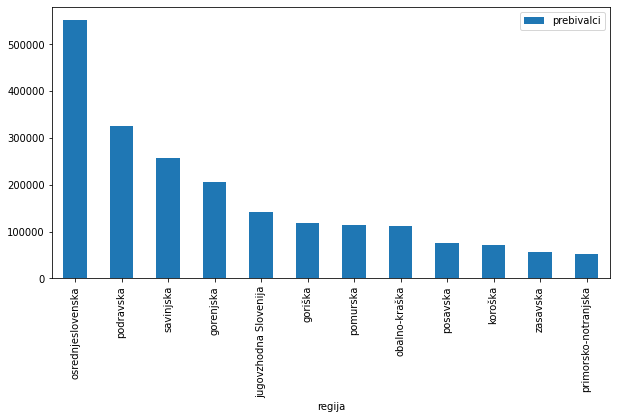

In [98]:
regije = obcine.groupby('regija').sum()[['prebivalci']].sort_values('prebivalci', ascending=False)
regije.plot.bar(figsize=(10, 5))

In [99]:
obcine.groupby('UE').sum()[['prebivalci']].sort_values('prebivalci', ascending=False)

,prebivalci
UE,
Ljubljana,368713
Maribor,149170
Kranj,82917
Ptuj,68938
Novo mesto,66237
Celje,65264
Domžale,59819
Nova Gorica,58453
Murska Sobota,54719


Kot lahko vidimo, je največ prebivalstva skoncentriranega na območju tistih upravnih enot, kjer se načeloma nahajajo mestne občine. Tovrsten naziv po Zakonu o lokalni samoupravi dobijo občine, ki imajo najmanj 15 tisoč delovnih mest, od tega s precejšnjo večino v terciarnem in kvartarnem sektorju dejavnosti, poleg tega pa so tudi pomembna središča širšega območja.
Zaradi tovrstnih dejstev je smisleno kasnejšo analizo omejiti tudi na najbolj poseljene upravne enote.

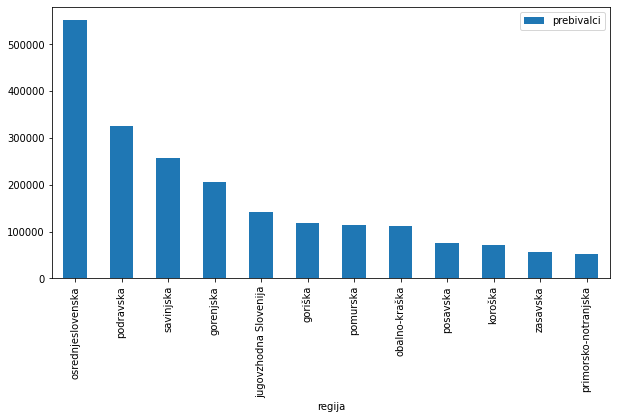

In [100]:
regije = obcine.groupby('regija').sum()[['prebivalci']].sort_values('prebivalci', ascending=False)
regije.plot.bar(figsize=(10, 5))

regije_place = obcine.groupby('placa')

<AxesSubplot:xlabel='delovna_aktivnost', ylabel='placa'>

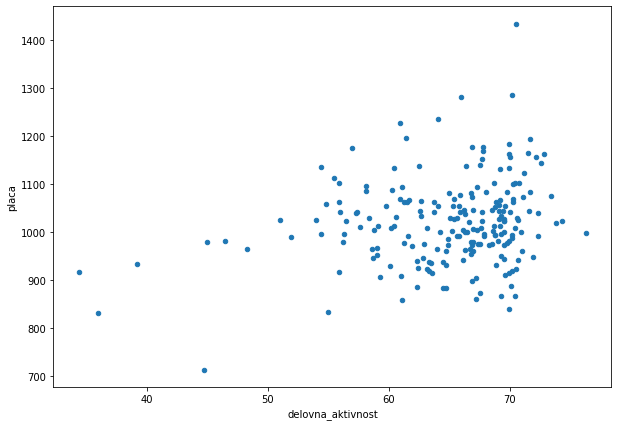

In [102]:
obcine[['delovna_aktivnost', 'placa']].plot.scatter('delovna_aktivnost', 'placa', figsize=(10,7))

### **Interpretacija izsledkov**

### **Zaključek**